In [1]:
import os
from tqdm import tqdm
import nltk
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import html
import pandas as pd
import re

from fyp.crypto import Crypto


In [2]:
pd.set_option('display.max_rows', 500)


In [3]:
crypto = Crypto()


In [4]:
base = '/its/home/ep396/Documents/FYP/'
name = "dataset"


In [5]:
def load_db(name, base):
    e = base + f"encrypted_{name}.db"
    d = base + f"decrypted_{name}.db"
    crypto.age_decrypt_file(e, d)


In [6]:
def unload_db(name, base):
    d = base + f"decrypted_{name}.db"
    os.remove(d)


In [7]:
load_db(name, base)


In [8]:
from fyp.db_dataset import Tweet, ReferencedTweet


In [9]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /its/home/ep396/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /its/home/ep396/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
sw = nltk.corpus.stopwords.words('english')


In [12]:
words_ne = {}

for tweet in tqdm(Tweet.select(Tweet.text), disable=False):
    for word in word_tokenize(html.unescape(re.sub(r"(^|[^@\w])@(\w{1,15})\b", '', tweet.text))):
        word = word.lower()
        if (word.isalnum()) and (not word.startswith("@")) and (not word.startswith("http")) and (word not in sw):
            if word not in words_ne:
                words_ne[word] = 1
            else:
                words_ne[word] += 1


100%|██████████| 2015360/2015360 [15:37<00:00, 2150.83it/s]


In [13]:
nlp_words = nltk.FreqDist(words_ne)


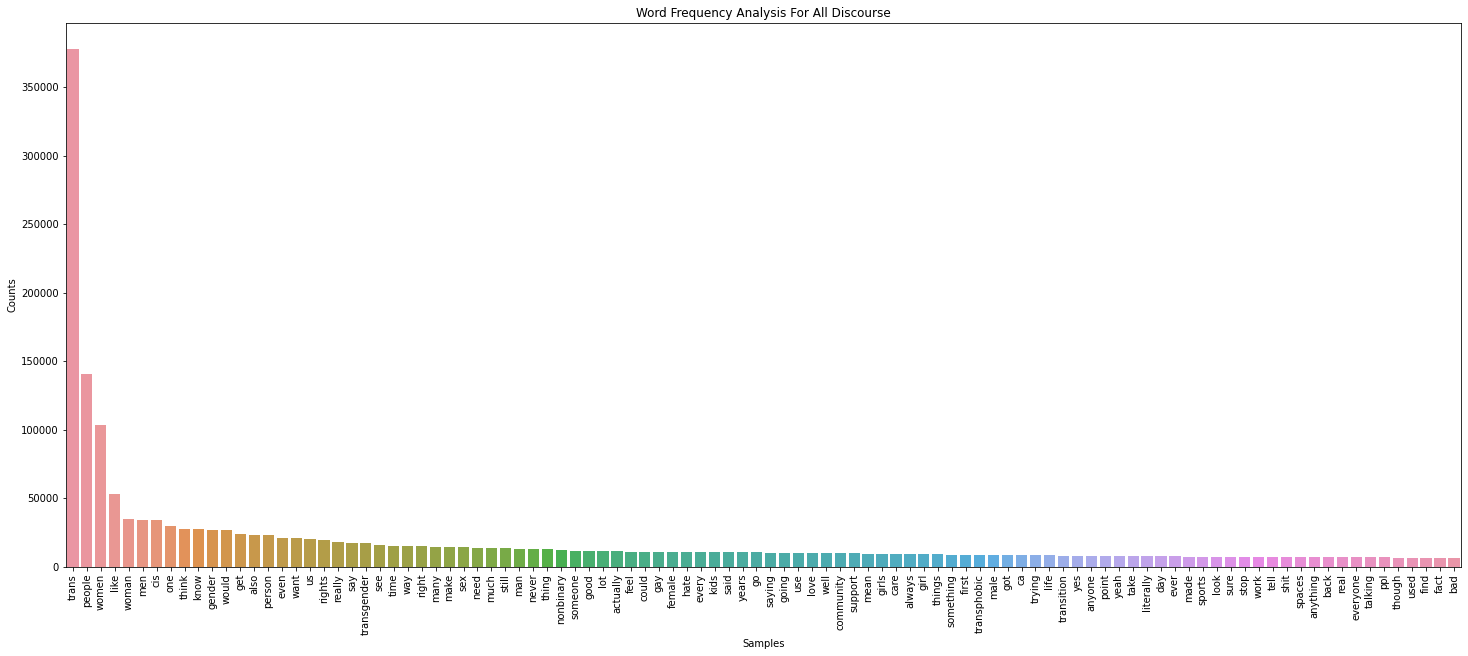

In [42]:
all_fdist = pd.Series(dict(nlp_words.most_common(100)))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
ax.set(xlabel="Samples", ylabel="Counts")
ax.set_title("Word Frequency Analysis For All Discourse")
plt.xticks(rotation=90)
plt.savefig("dataset_freq_anal/all.jpg")
plt.show()


In [15]:
df_fdist = pd.DataFrame.from_dict(nlp_words, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist.sort_values(by = 'Frequency', ascending=False).to_csv("freq.csv", encoding='utf-8')


In [16]:
gephi_df = pd.read_csv("/its/home/ep396/Documents/FYP/data/gephi/1.csv")


In [17]:
from fyp.db import User, UserInteractorRelationships, Database


In [18]:
gephi_df


,Id,Label,timeset,total,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,...,Authority,Hub,pageranks,componentnumber,strongcompnum,modularity_class,stat_inf_class,clustering,eigencentrality,filter
0,1,1.0,NaN,57,31,12,43,91,57,148,...,0.003194,0.004824,0.000341,0,22,3,67,0.069686,0.014976,1
1,37,NaN,NaN,84,18,17,35,78,84,162,...,0.001280,0.005589,0.000484,0,22,3,140,0.080645,0.039212,999
2,42,NaN,NaN,10,11,5,16,23,10,33,...,0.000881,0.003348,0.000033,0,22,10,168,0.085714,0.003515,999
3,46,NaN,NaN,368,25,54,79,246,368,614,...,0.001823,0.022597,0.000073,0,22,3,400,0.039294,0.004176,999
4,47,NaN,NaN,4,2,2,4,5,4,9,...,0.000180,0.000718,0.000014,0,22,3,292,0.166667,0.000312,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,114570,NaN,NaN,10,0,2,2,0,10,10,...,0.000000,0.000194,0.000010,0,10734,3,189,0.000000,0.000000,999
14741,114588,NaN,NaN,3,0,2,2,0,3,3,...,0.000000,0.000010,0.000010,0,10735,11,189,0.000000,0.000000,999
14742,114612,NaN,NaN,5,0,2,2,0,5,5,...,0.000000,0.000440,0.000010,0,10736,11,4,0.000000,0.000000,999
14743,115069,NaN,NaN,4,0,2,2,0,4,4,...,0.000000,0.000241,0.000010,0,10737,30,160,0.000000,0.000000,999


In [19]:
gephi_dict = gephi_df.to_dict()


In [20]:
gephi_df['modularity_class'].unique()


array([ 3, 10,  4, 21, 26, 19, 30, 11,  5,  0, 29,  8,  1, 23,  2, 22, 16,
       20, 18, 15,  9, 12,  7, 13,  6, 25, 14, 17, 28, 24, 27])

In [21]:
modularity_classes = {}

for modularity_class in gephi_df['modularity_class'].unique():
    modularity_classes[modularity_class] = []
    raw_users_within_class = gephi_df.loc[gephi_df['modularity_class'] == modularity_class].to_dict('records')
    for user in raw_users_within_class:
        modularity_classes[modularity_class].append(user['Id'])


In [22]:
print({key: len(value) for key, value in modularity_classes.items()})


{3: 2121, 10: 530, 4: 498, 21: 326, 26: 2509, 19: 279, 30: 1626, 11: 951, 5: 374, 0: 173, 29: 367, 8: 330, 1: 792, 23: 620, 2: 263, 22: 50, 16: 218, 20: 345, 18: 252, 15: 68, 9: 246, 12: 139, 7: 304, 13: 229, 6: 293, 25: 215, 14: 324, 17: 148, 28: 107, 24: 46, 27: 2}


In [23]:
database = Database(crypto)


In [24]:
database.encrypt_or_decrypt()


100%|██████████| 14745/14745 [05:41<00:00, 43.22it/s]


In [25]:
tweet_to_id = {}

for user in User.select():
    tweet_to_id[user.id] = user.twitter_user_id


In [26]:
database.encrypt_or_decrypt()


100%|██████████| 14745/14745 [05:36<00:00, 43.86it/s]


In [27]:
modularity_classes_map = {}

for mod_class, users in modularity_classes.items():
    for user in users:
        modularity_classes_map[user] = mod_class


In [28]:
twitter_users = {value: key for key, value in tweet_to_id.items()}


In [34]:
word_collections = {}

for tweet in tqdm(Tweet.select(Tweet.text, Tweet.author_id)):
    mod_class = modularity_classes_map[twitter_users[str(tweet.author_id)]]
    if mod_class not in word_collections:
        word_collections[mod_class] = {}

    for word in word_tokenize(html.unescape(re.sub(r"(^|[^@\w])@(\w{1,15})\b", '', tweet.text))):
        word = word.lower()
        if (word.isalnum()) and (not word.startswith("@")) and (not word.startswith("http")) and (word not in sw):
            if word not in word_collections[mod_class]:
                word_collections[mod_class][word] = 1
            else:
                word_collections[mod_class][word] += 1


100%|██████████| 2015360/2015360 [18:08<00:00, 1852.29it/s]


<ipython-input-43-d210ccb7f166>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(25,10))


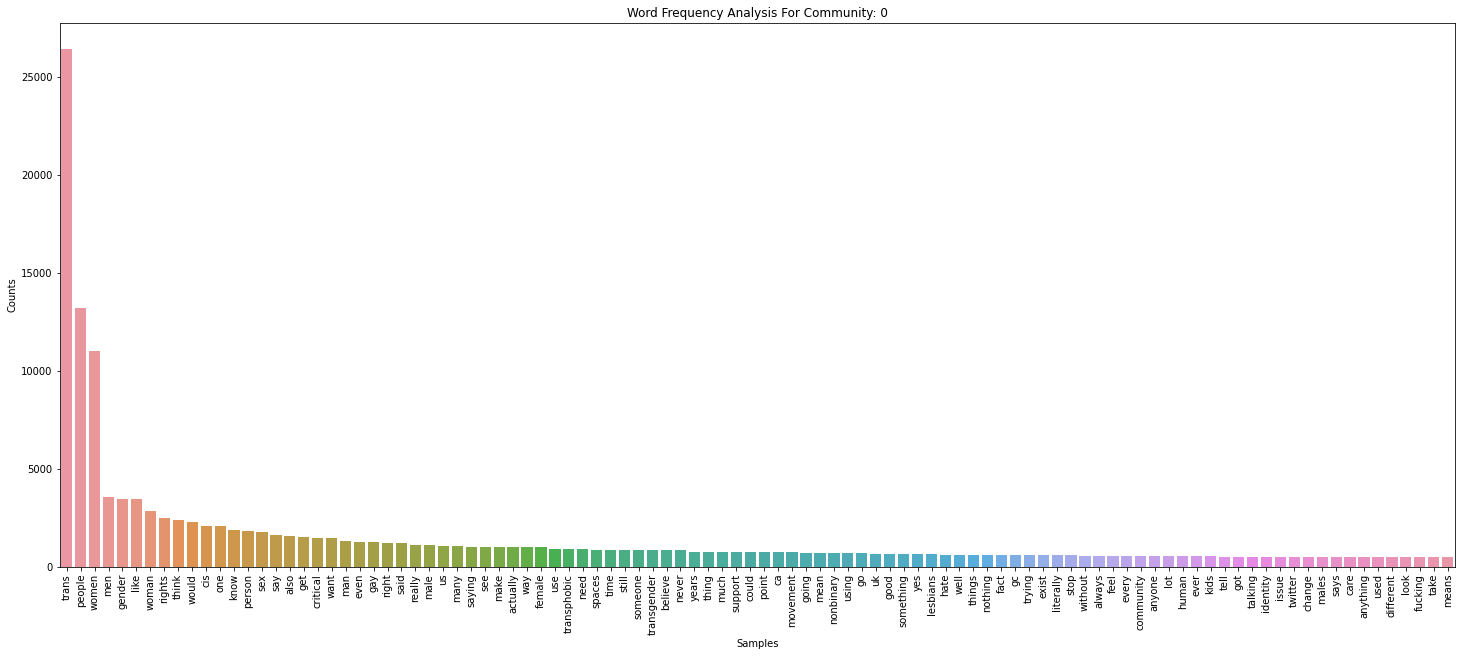

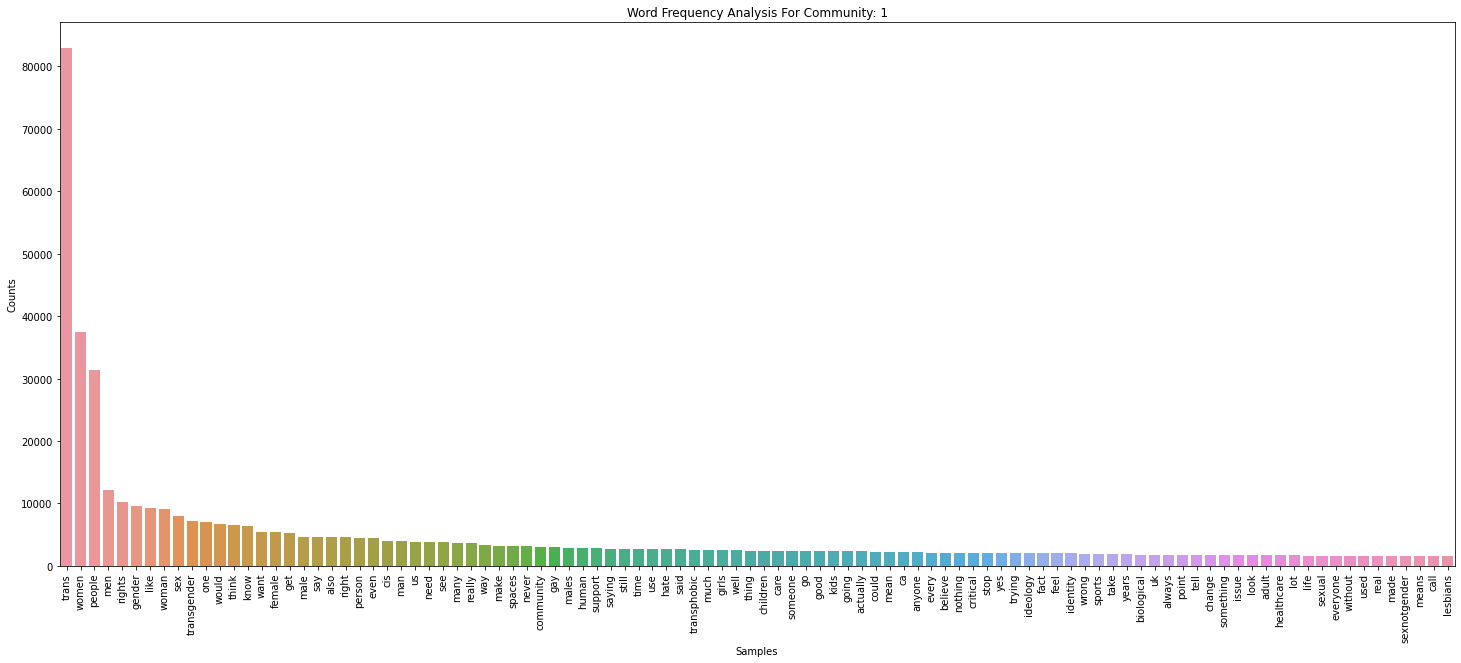

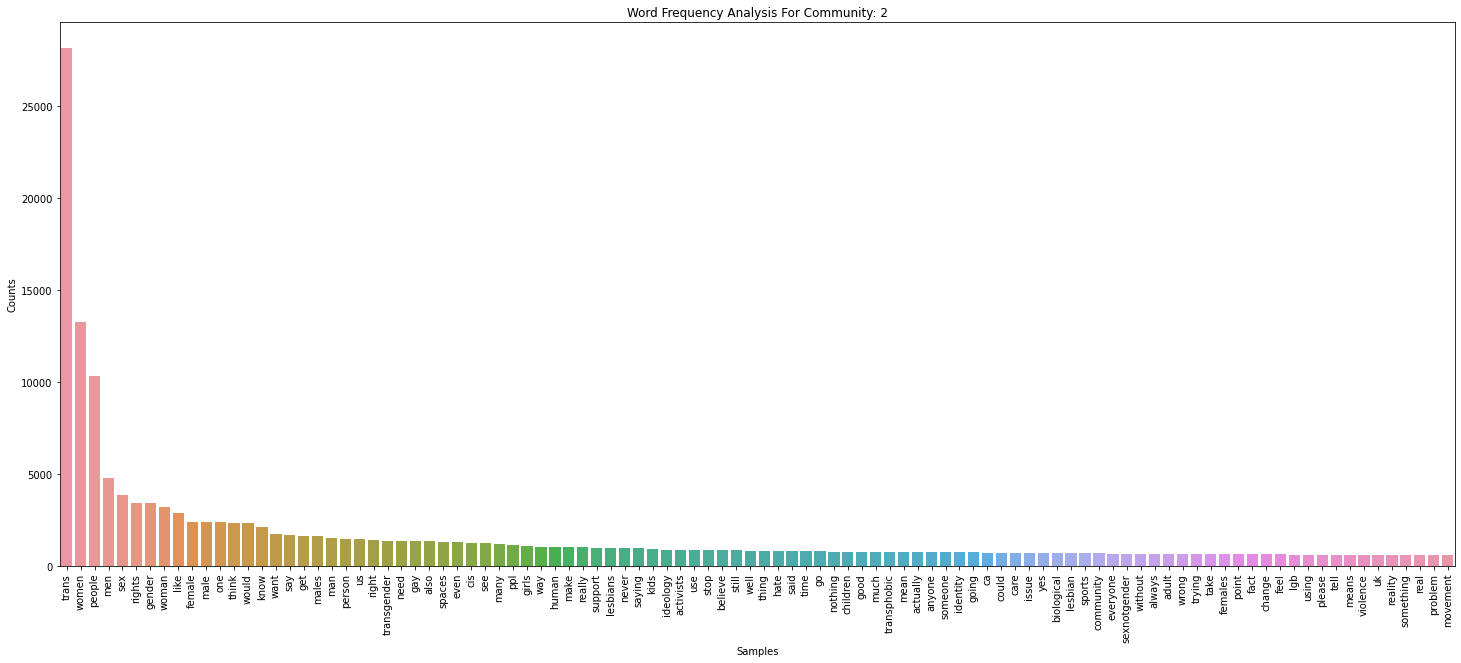

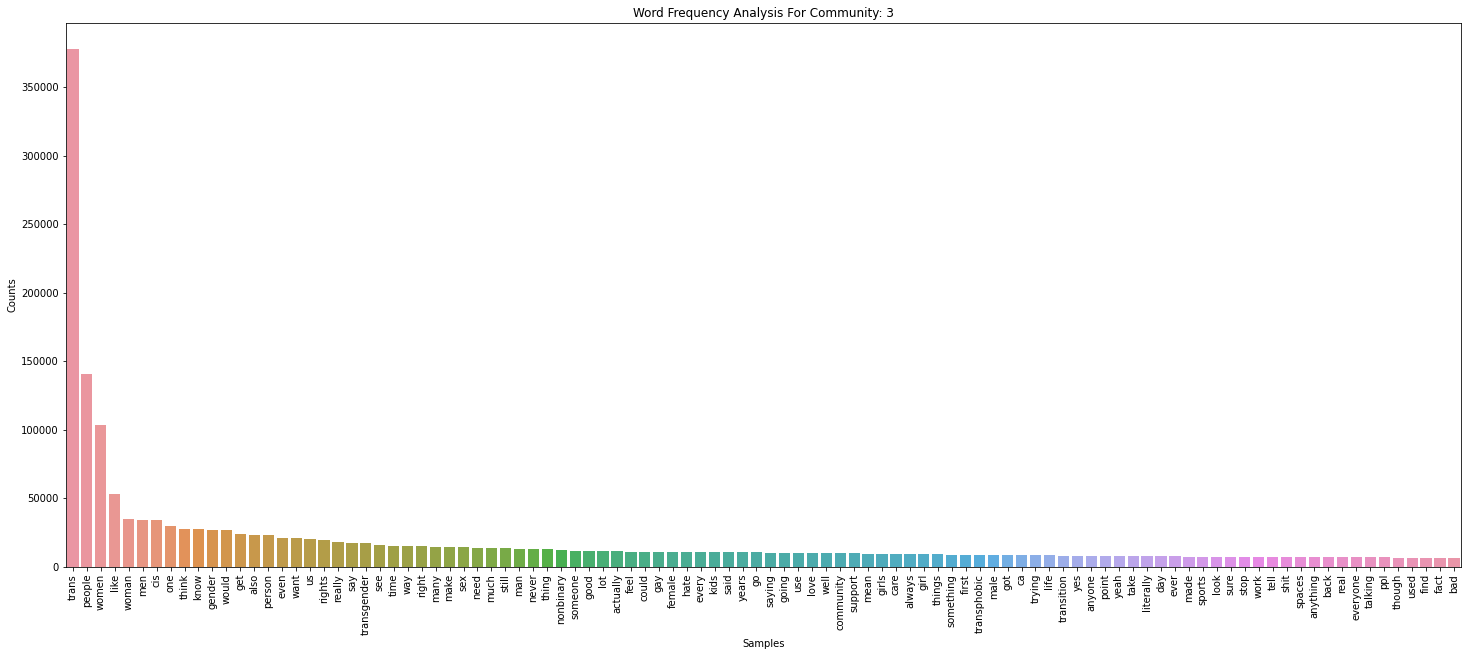

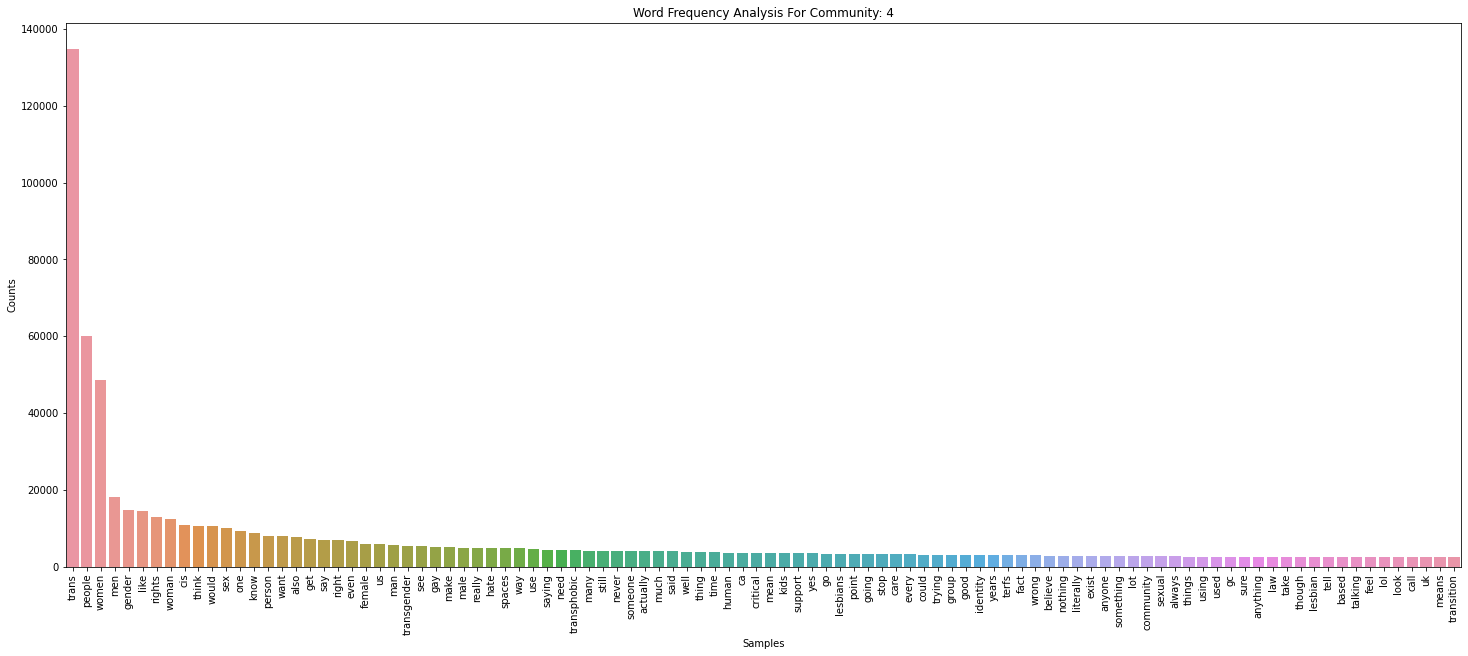

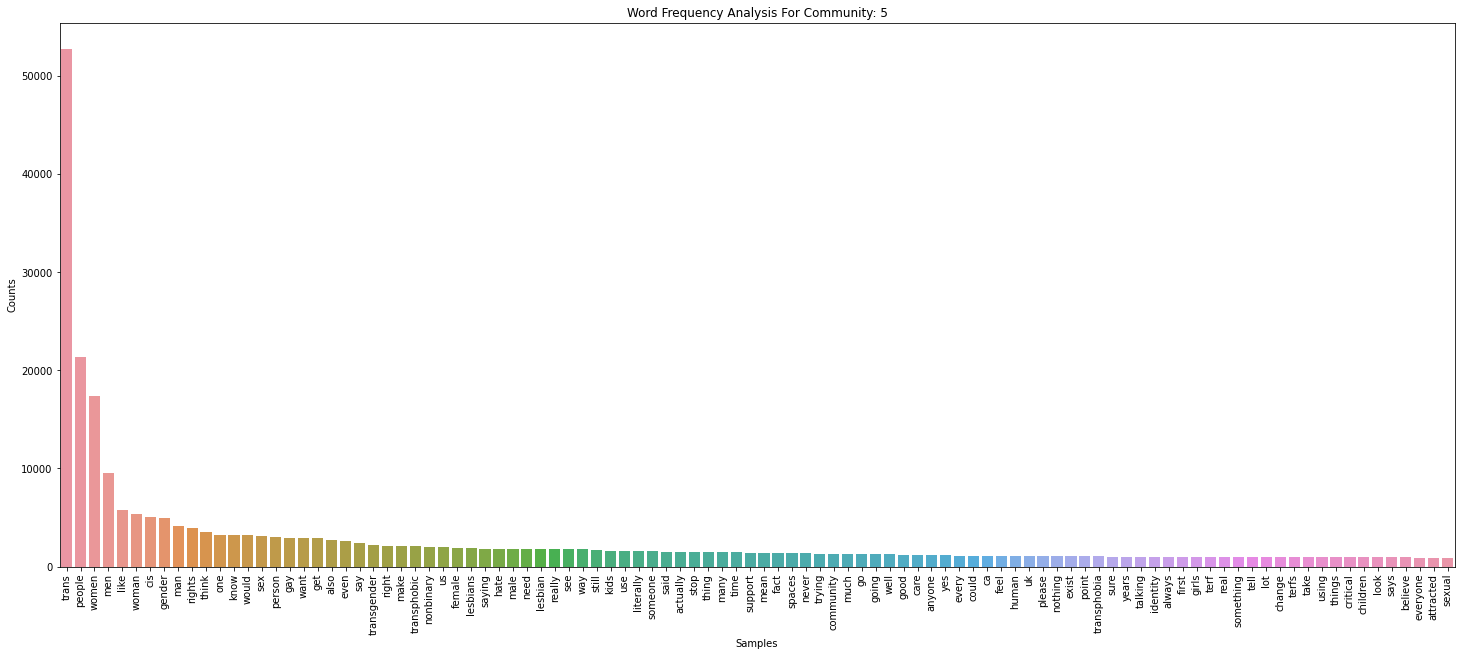

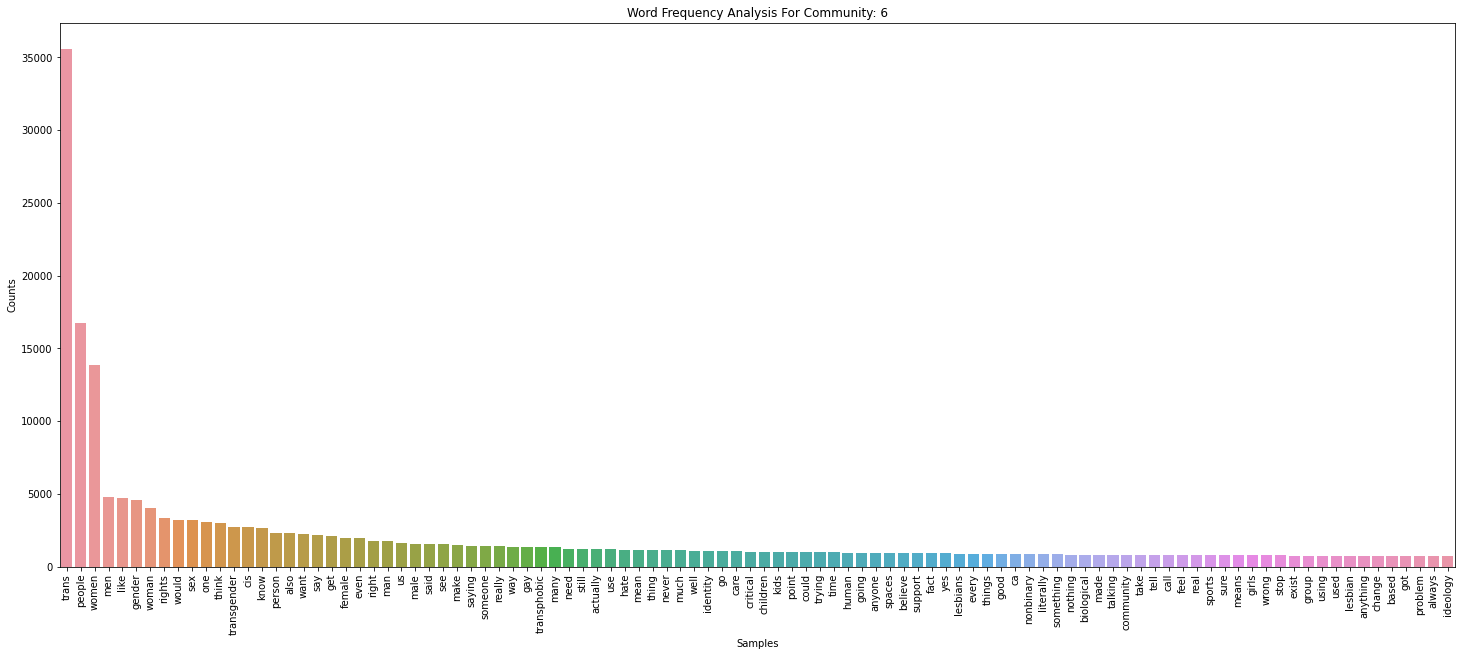

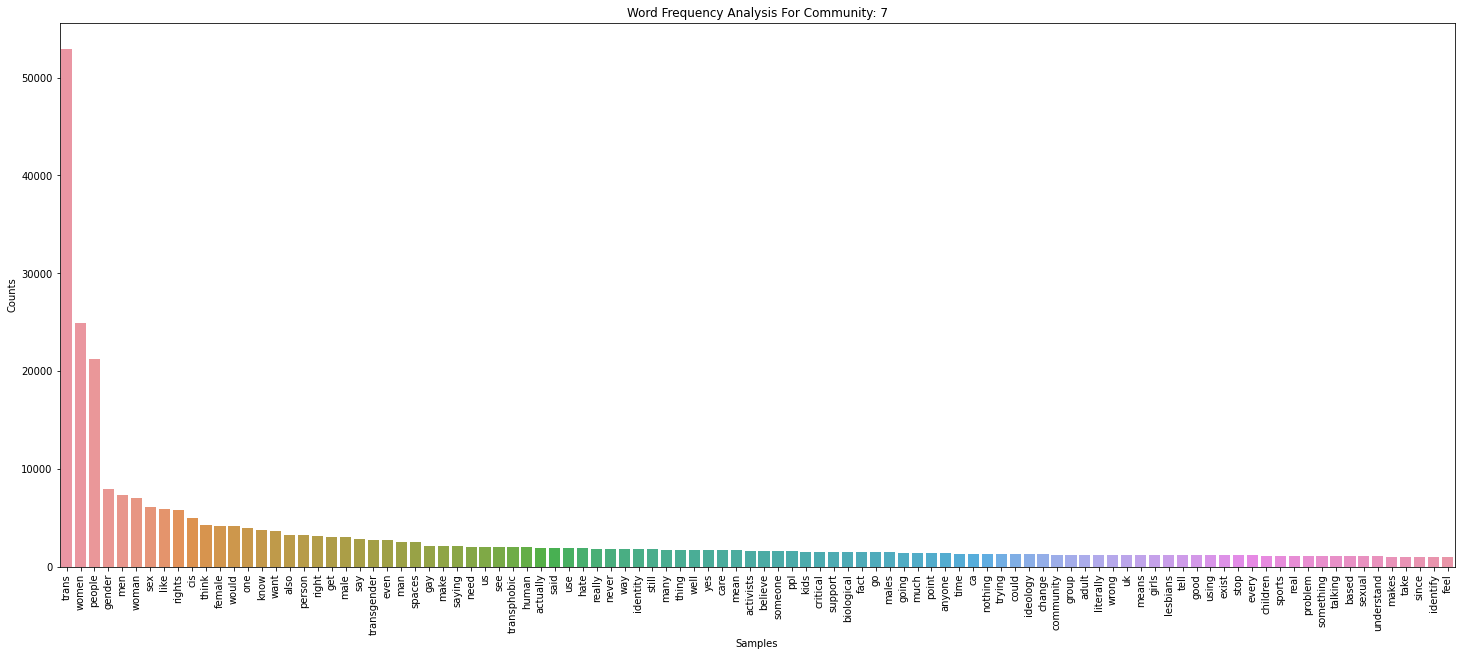

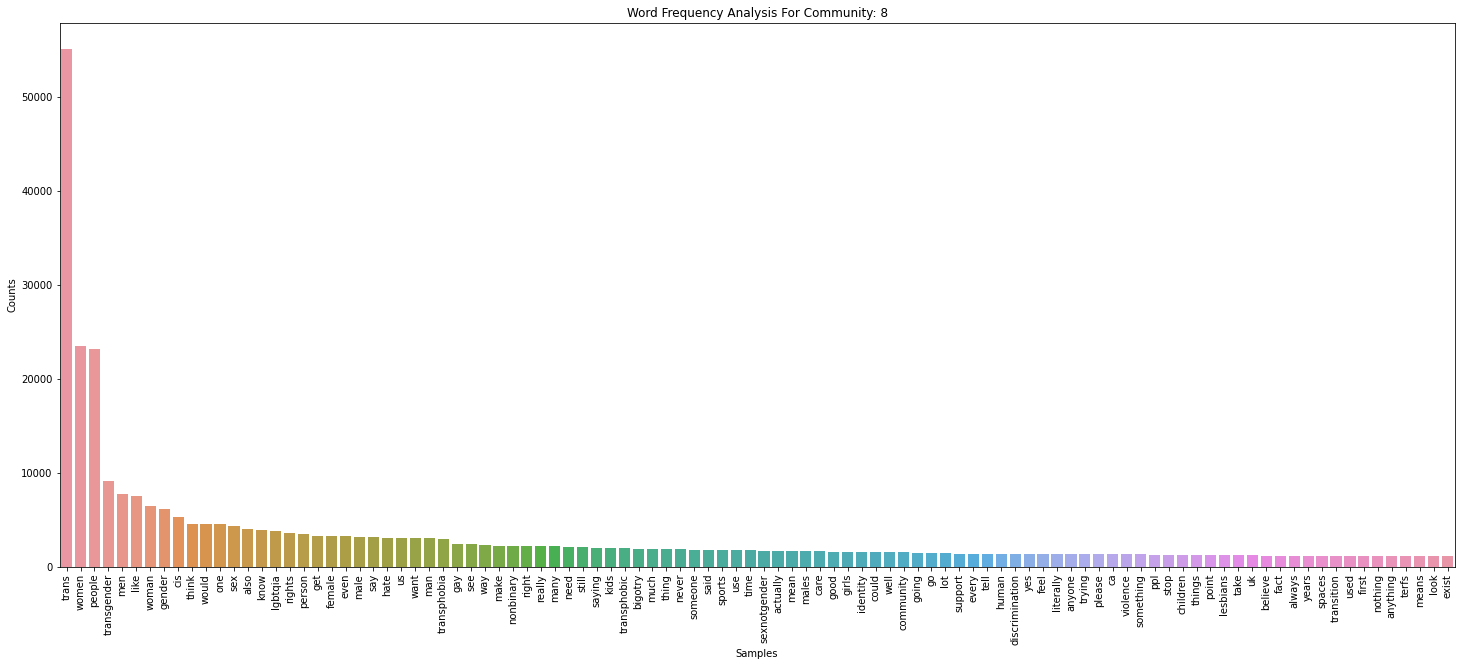

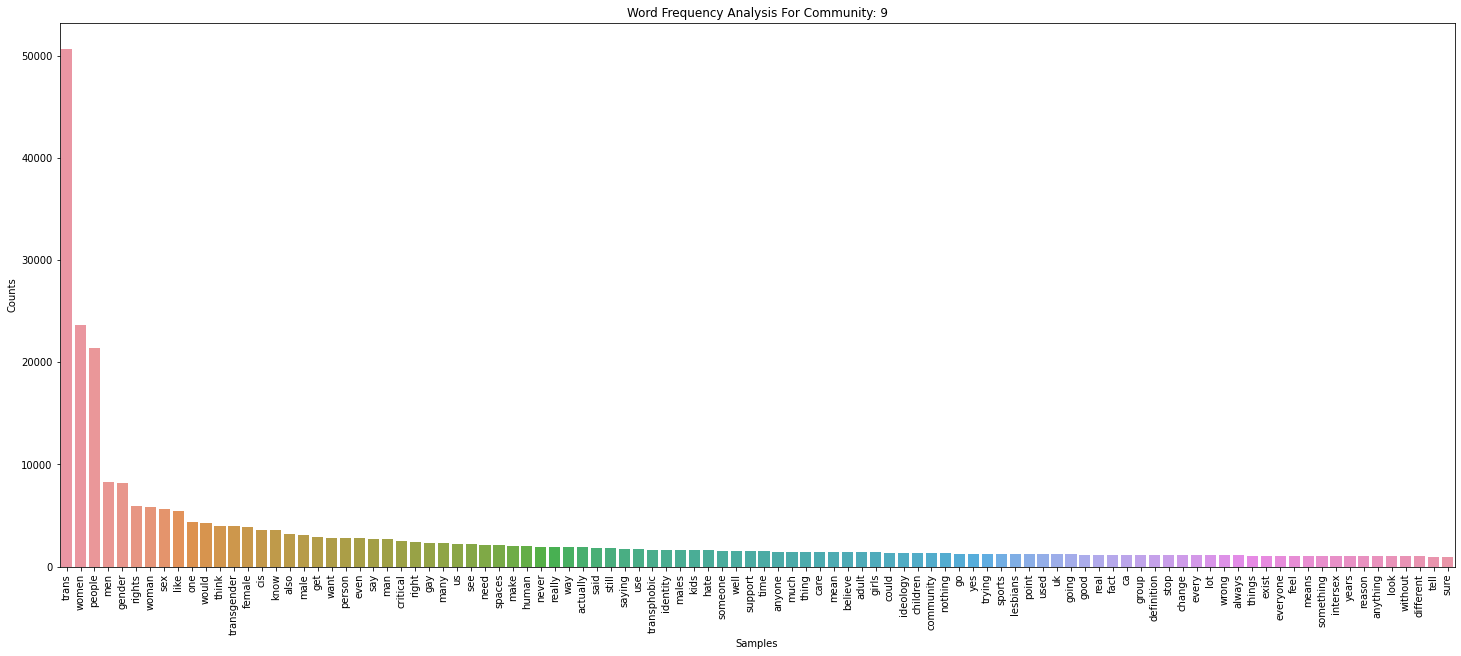

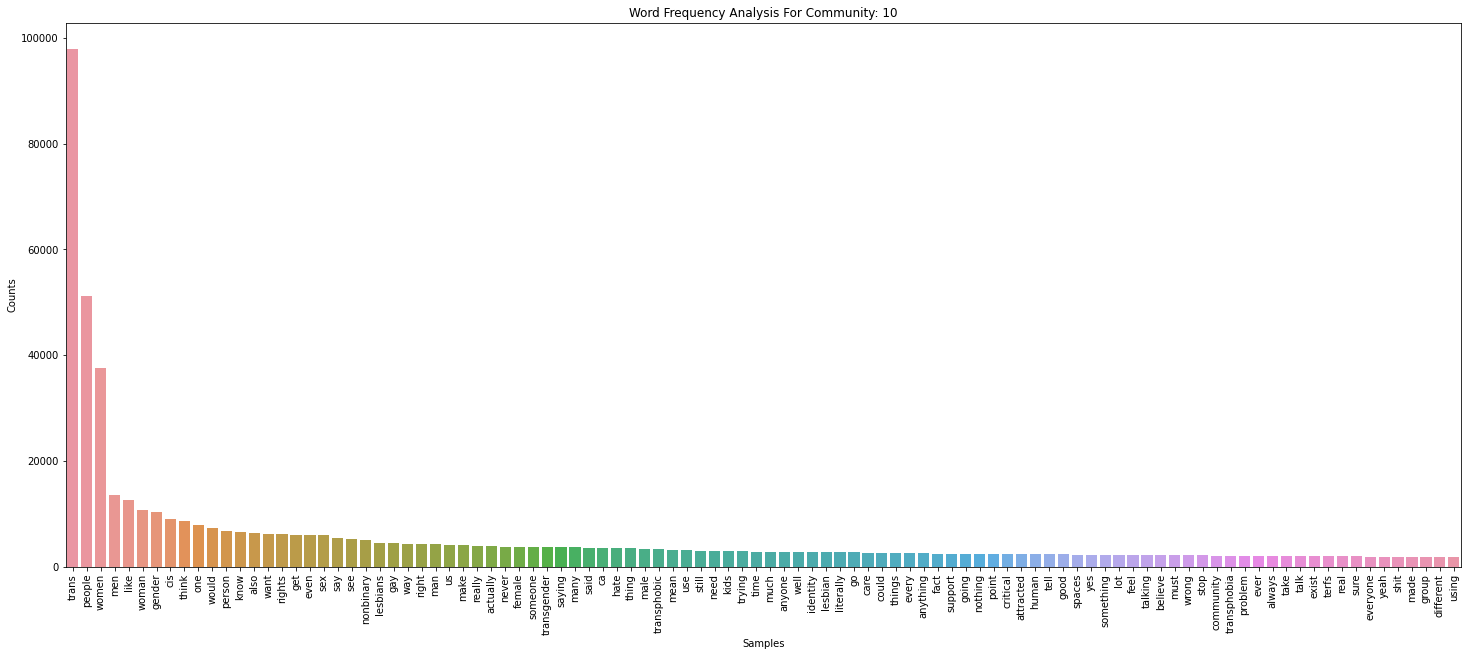

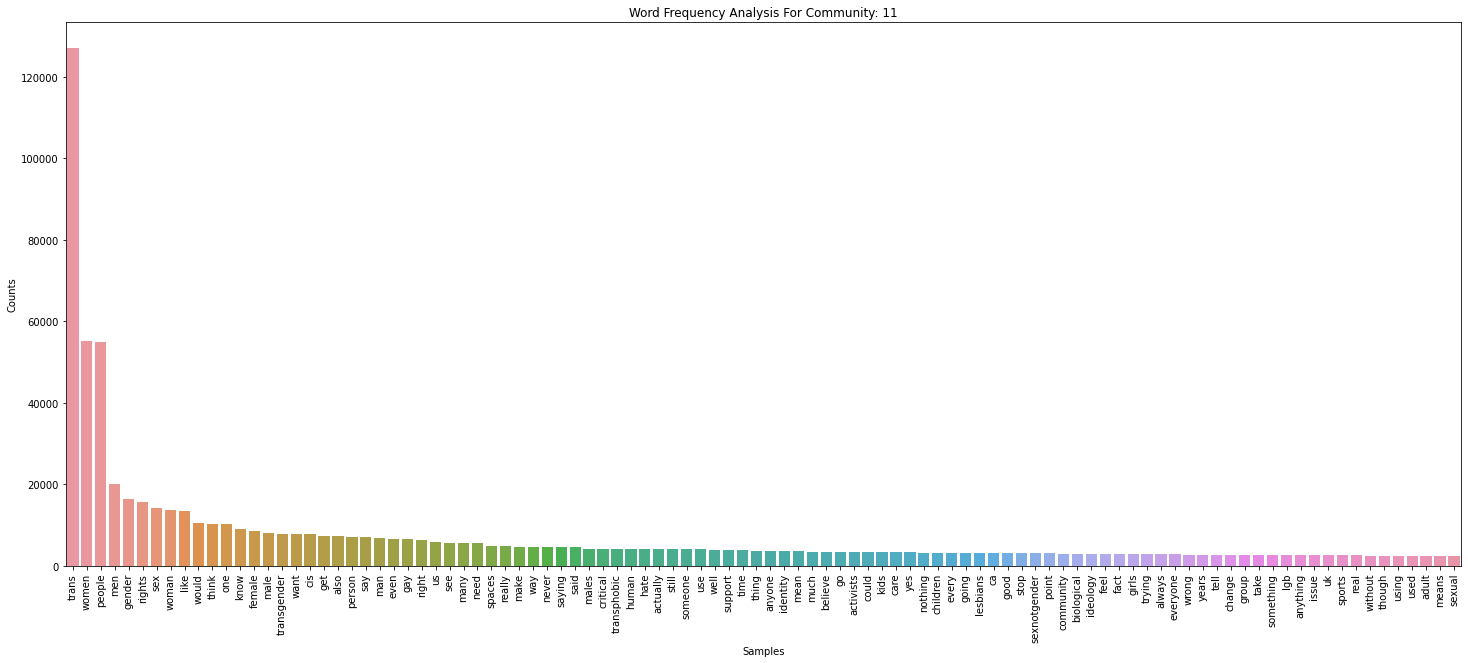

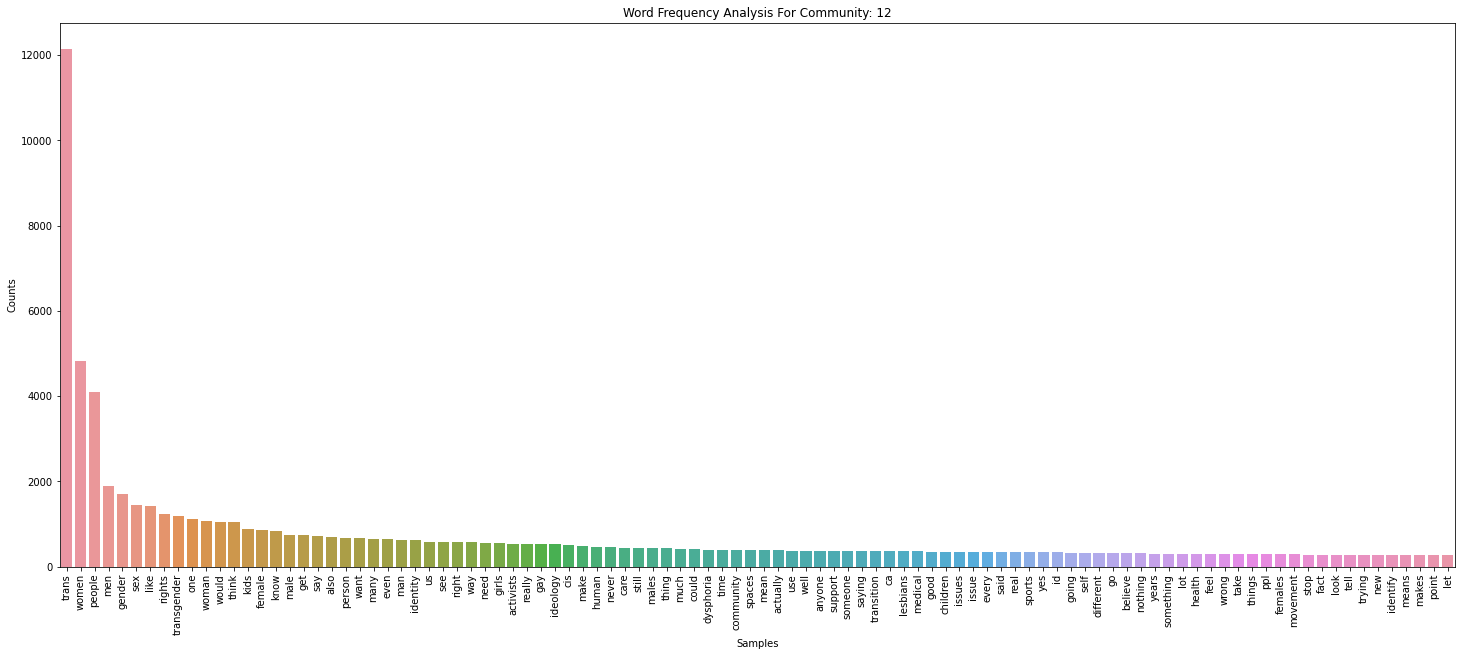

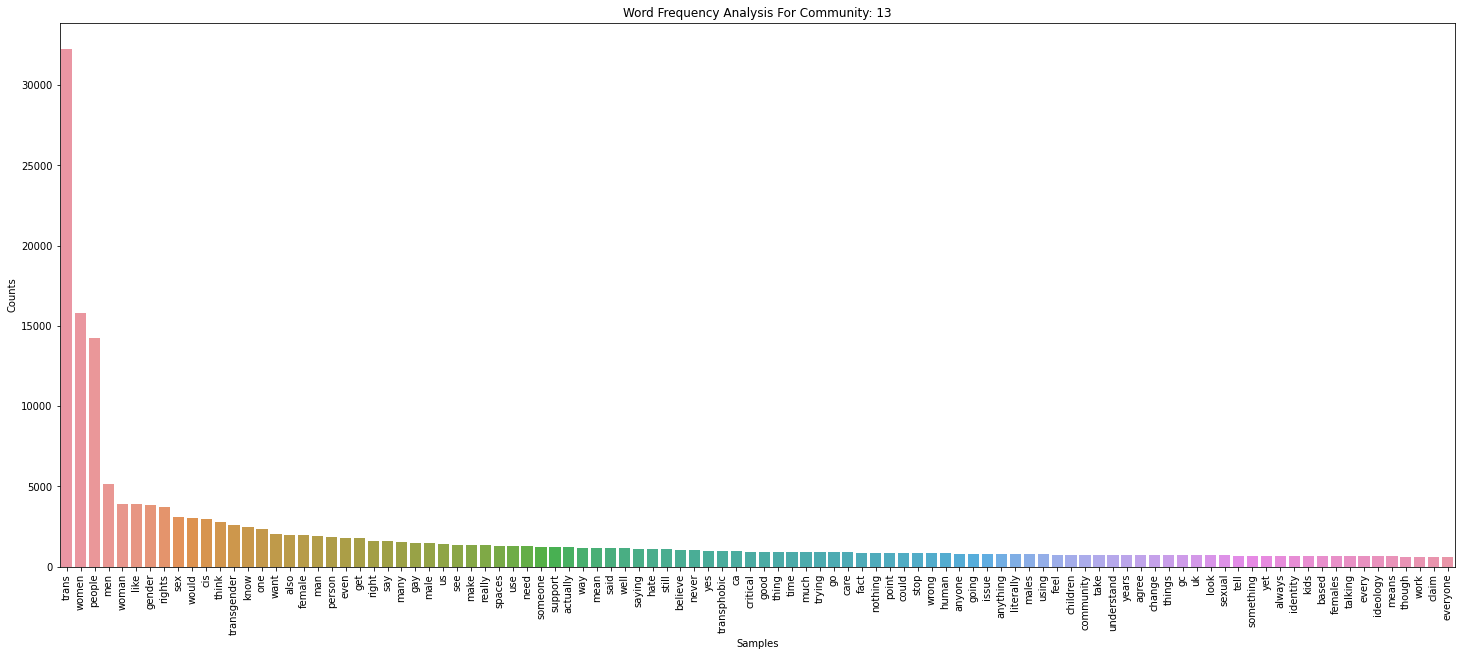

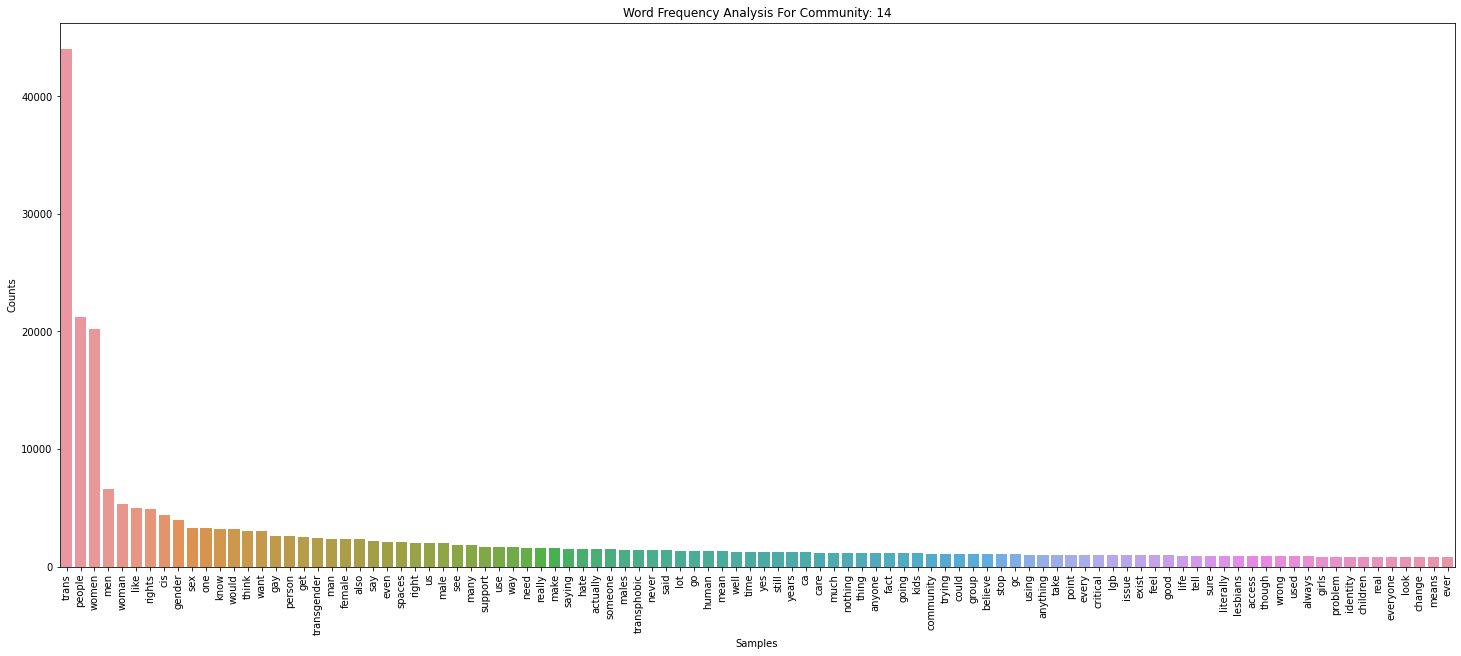

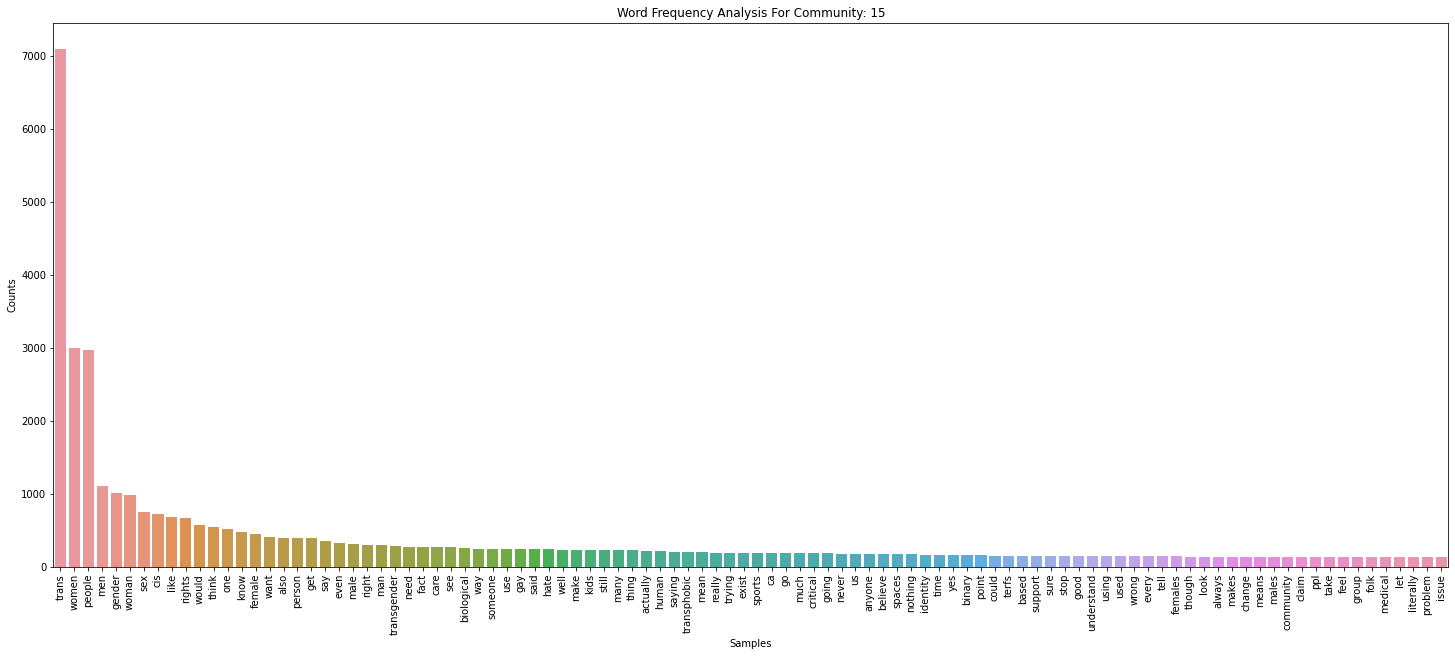

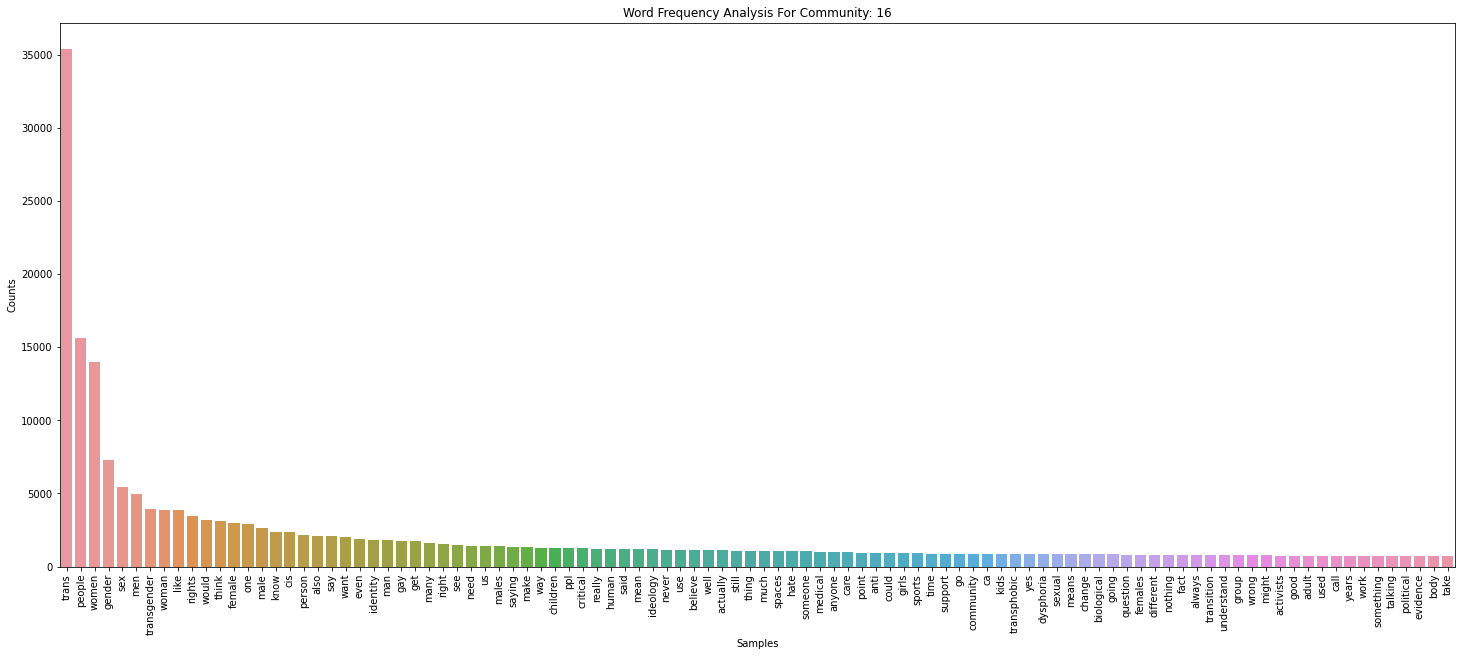

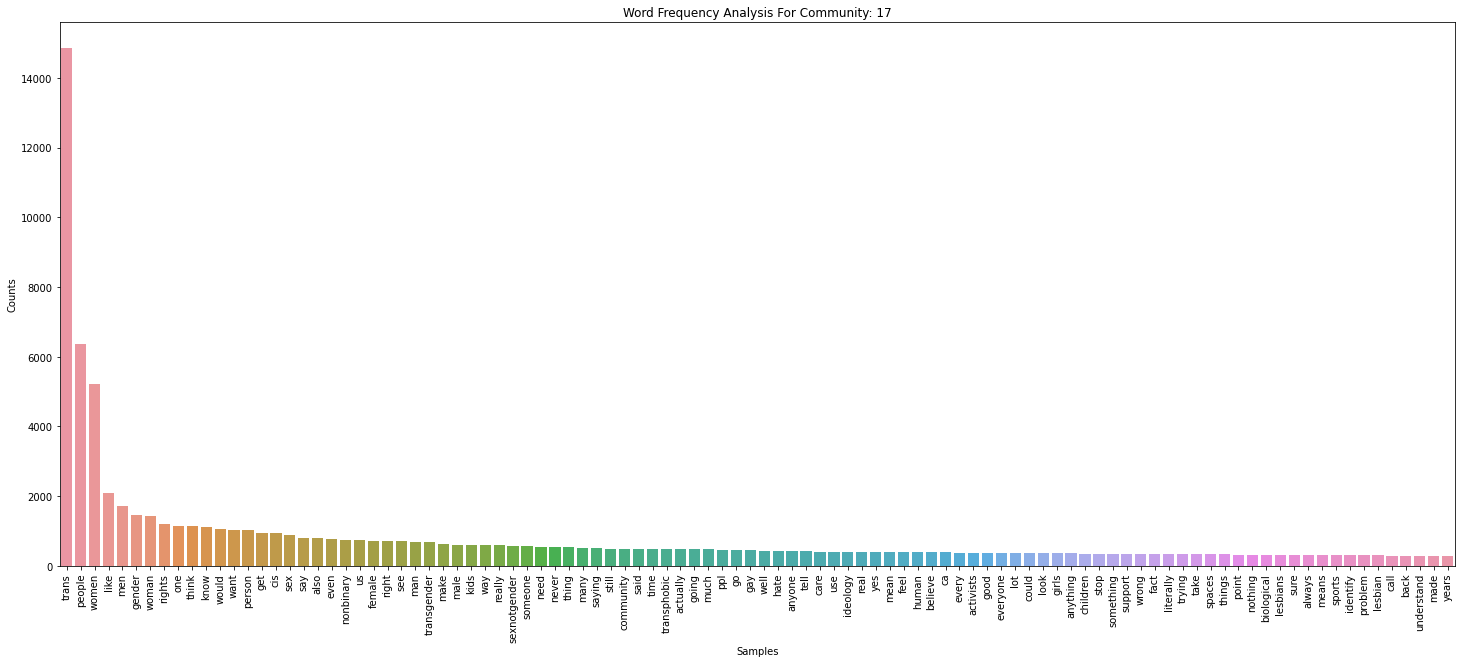

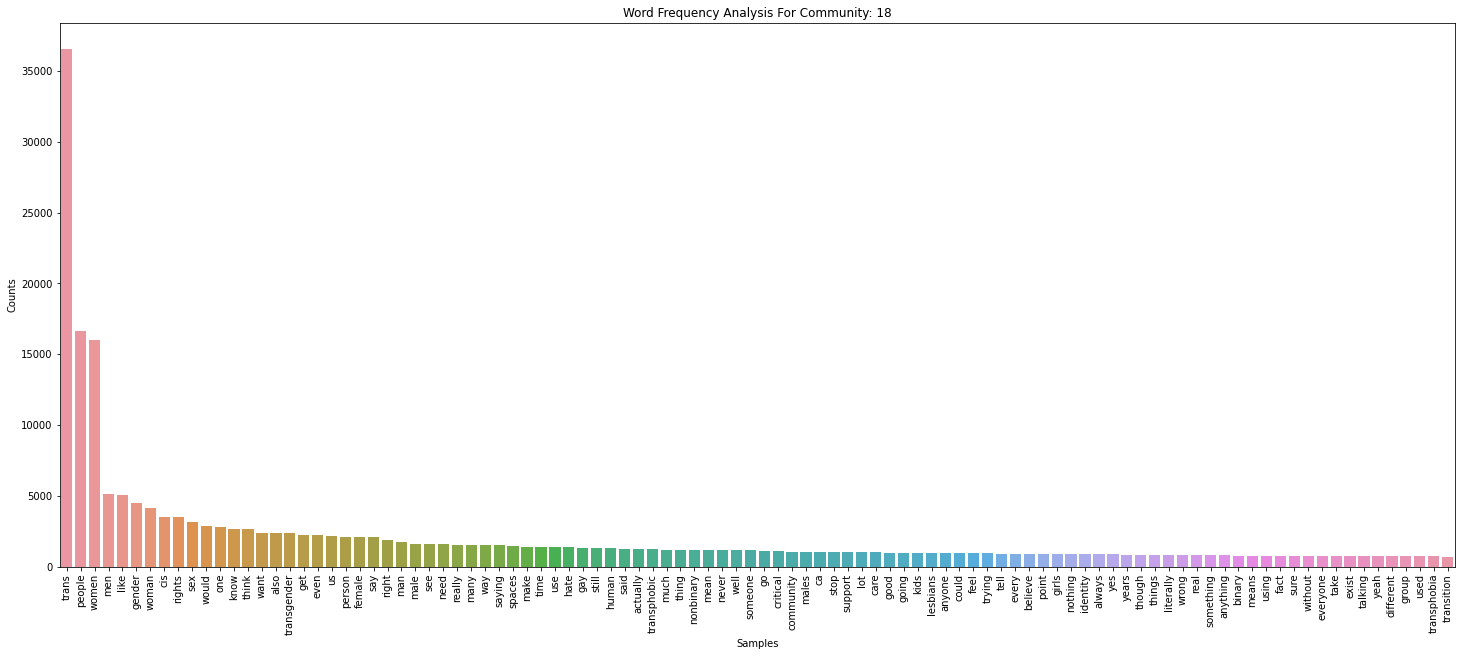

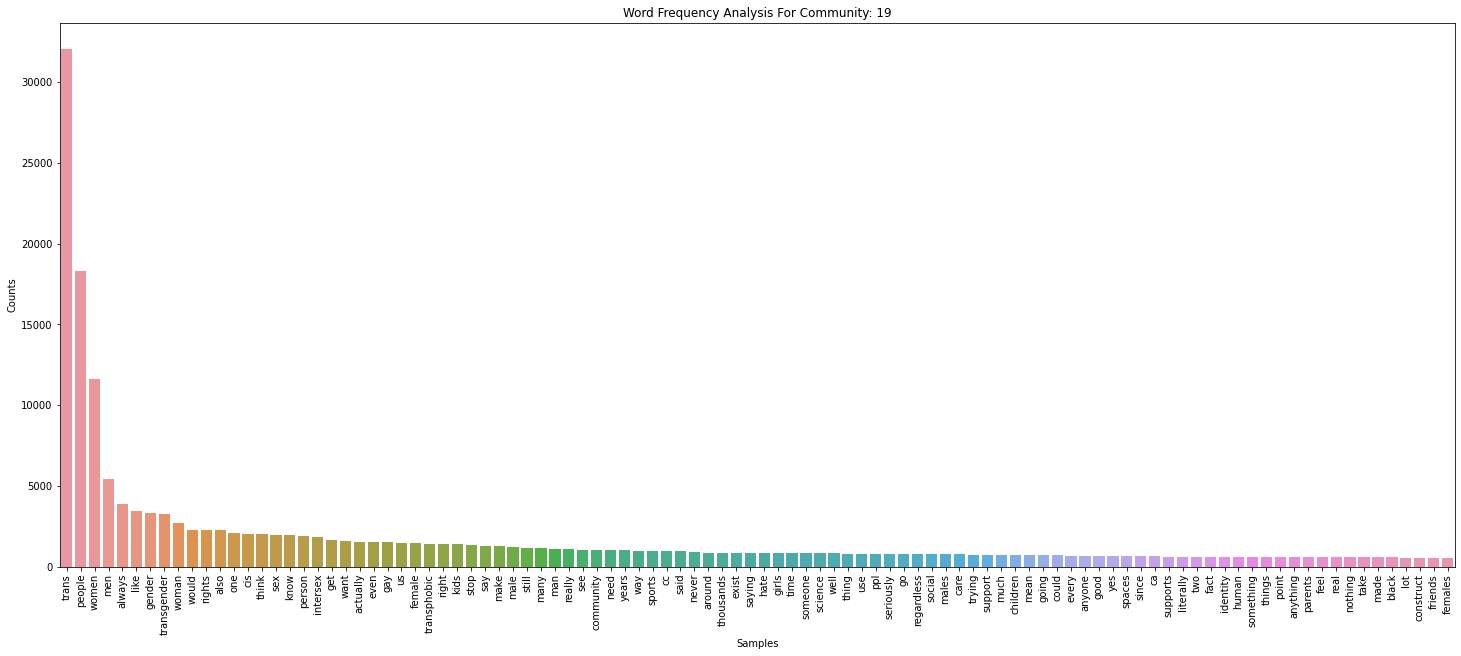

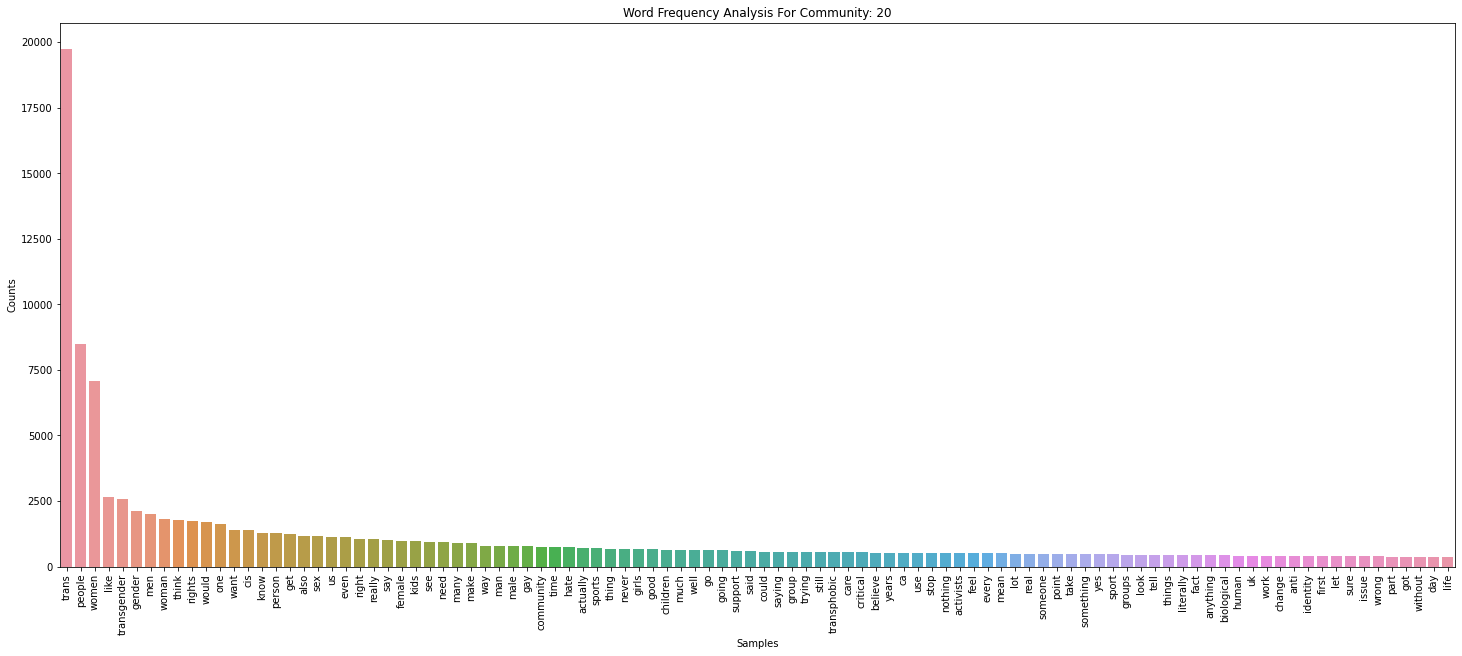

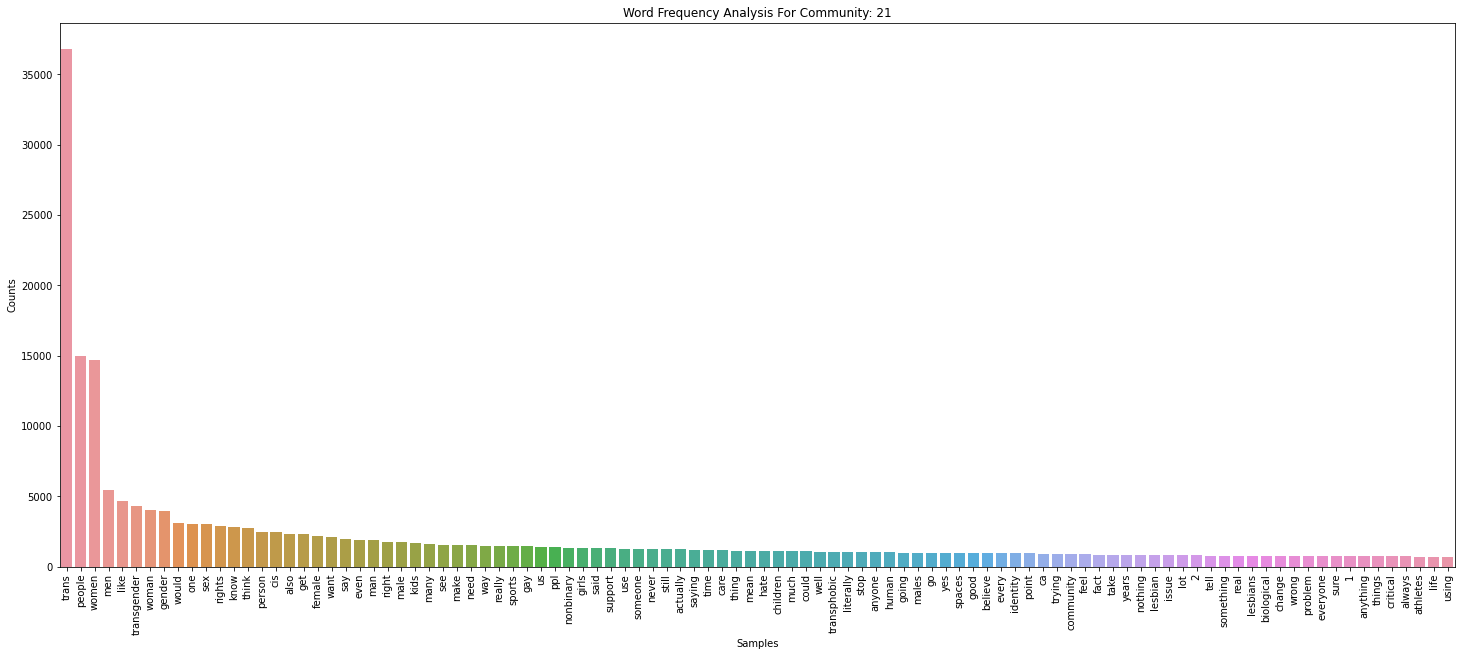

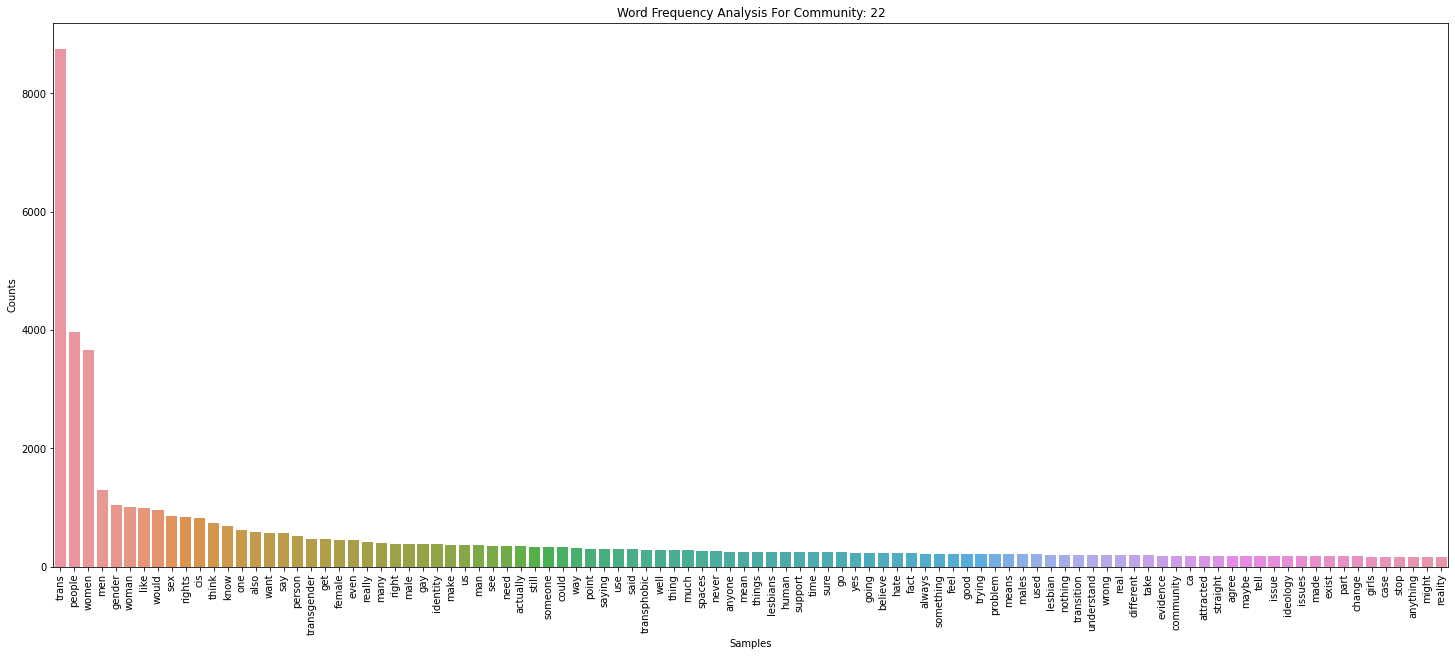

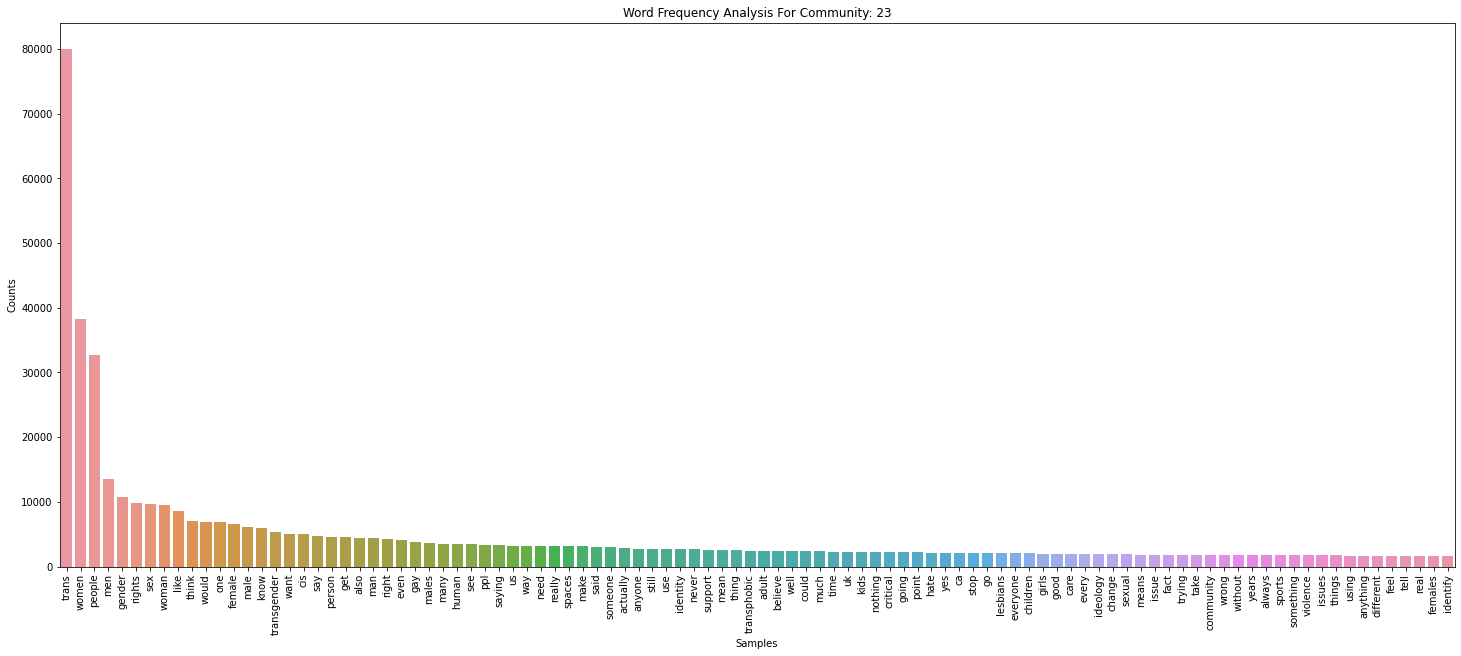

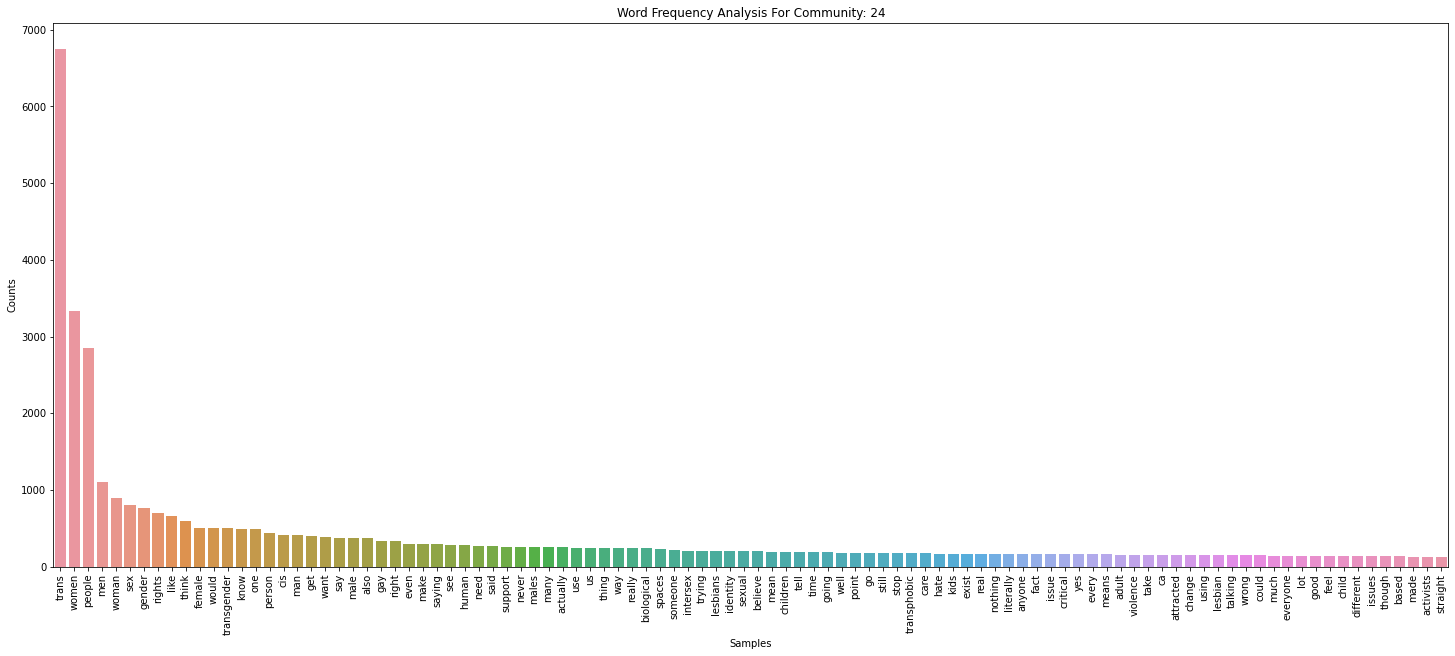

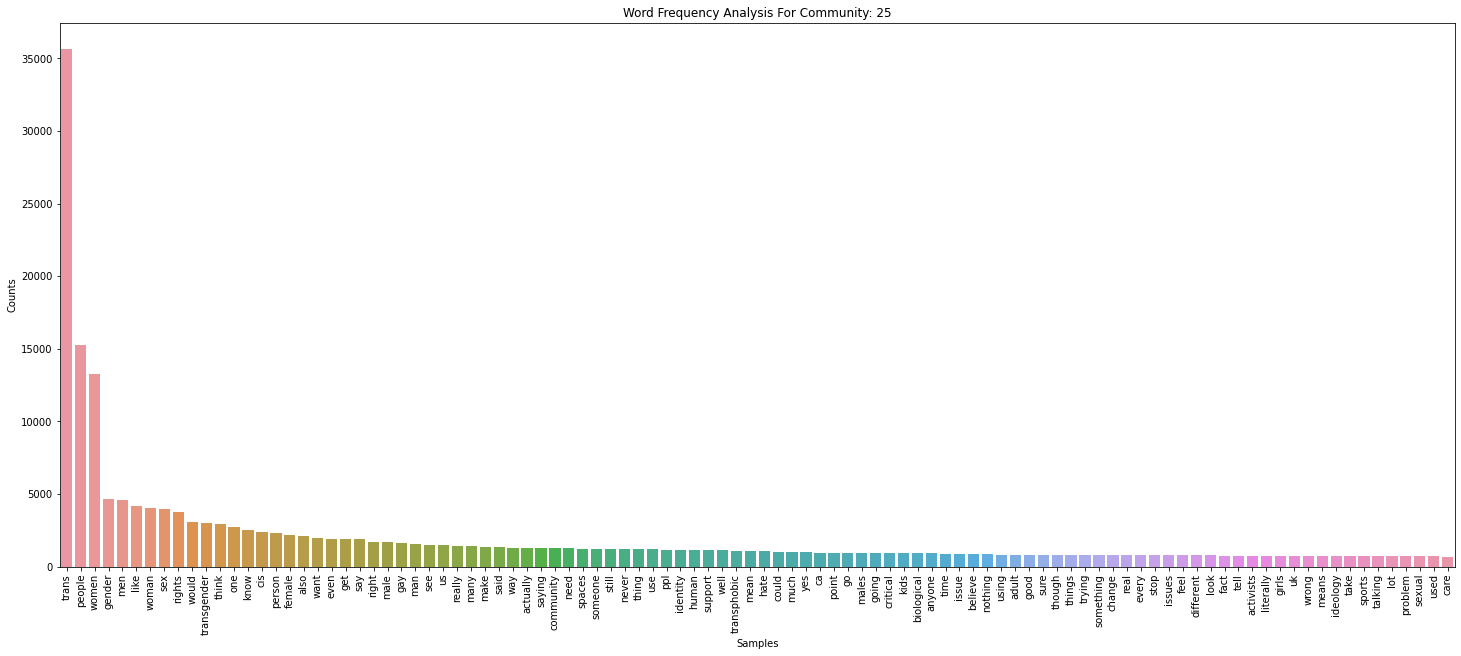

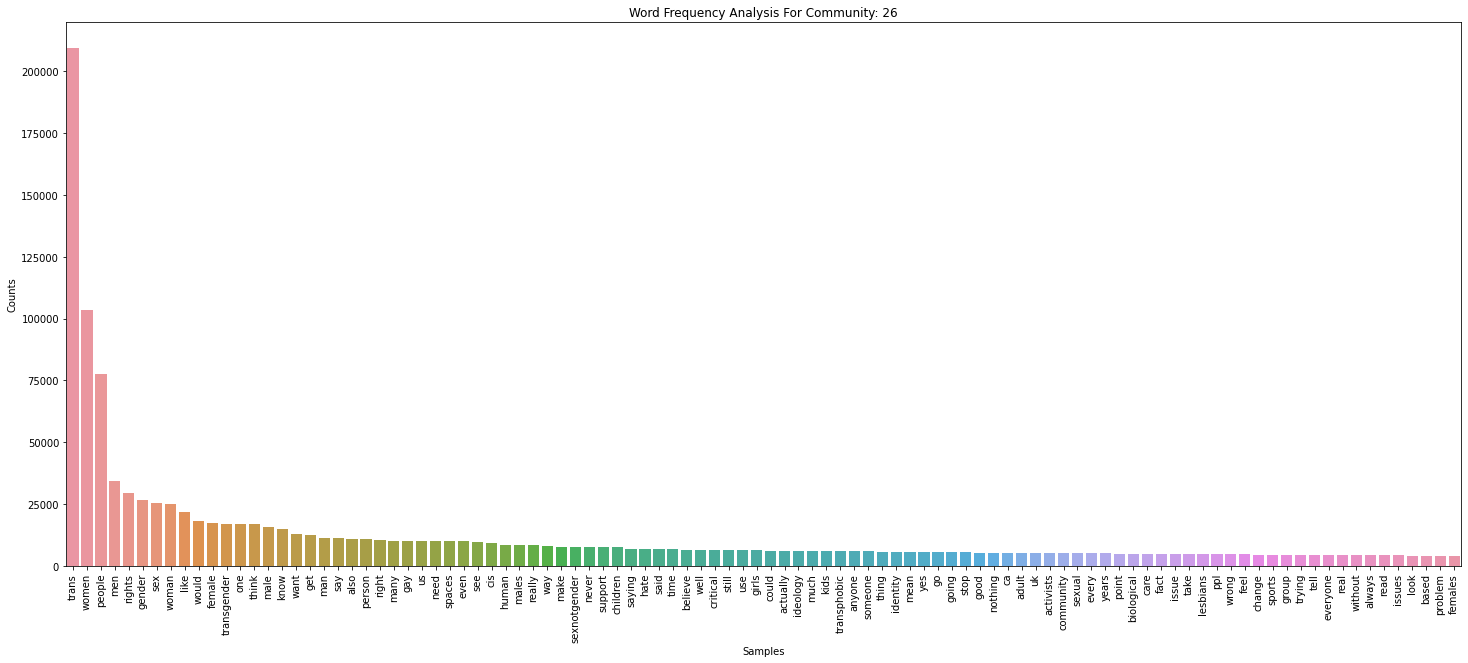

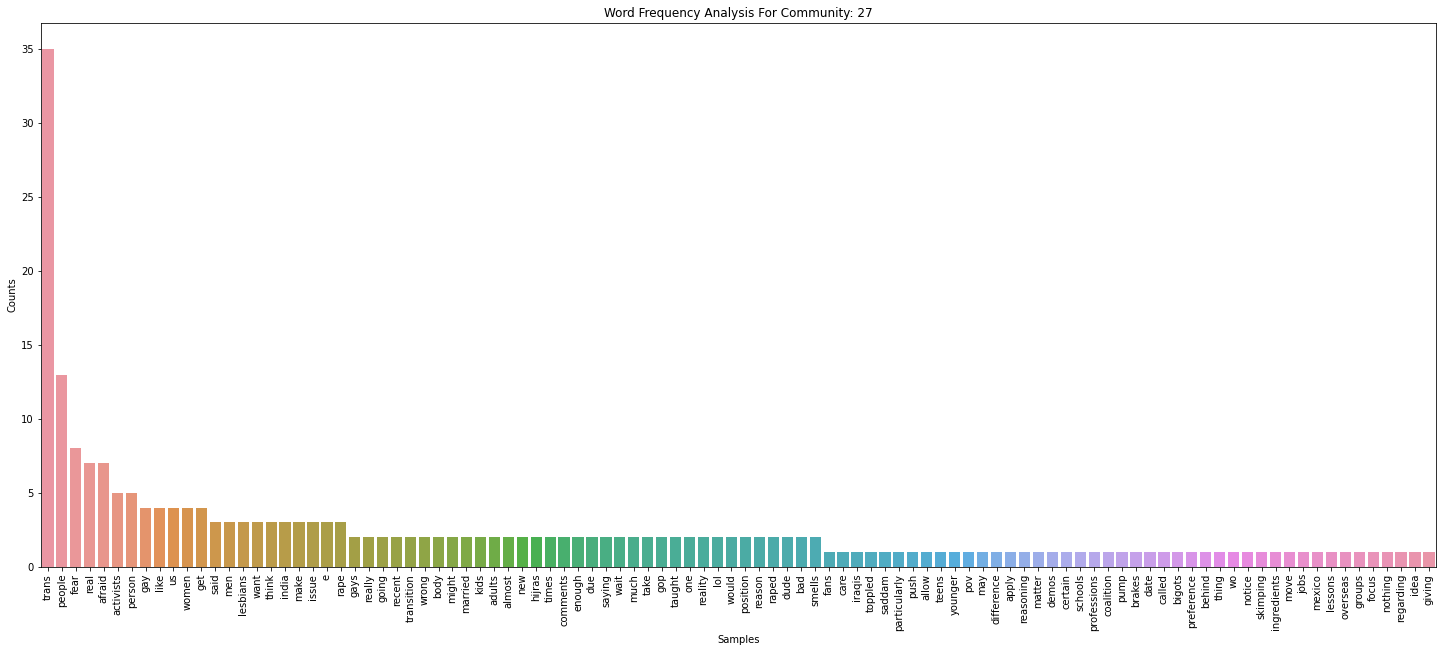

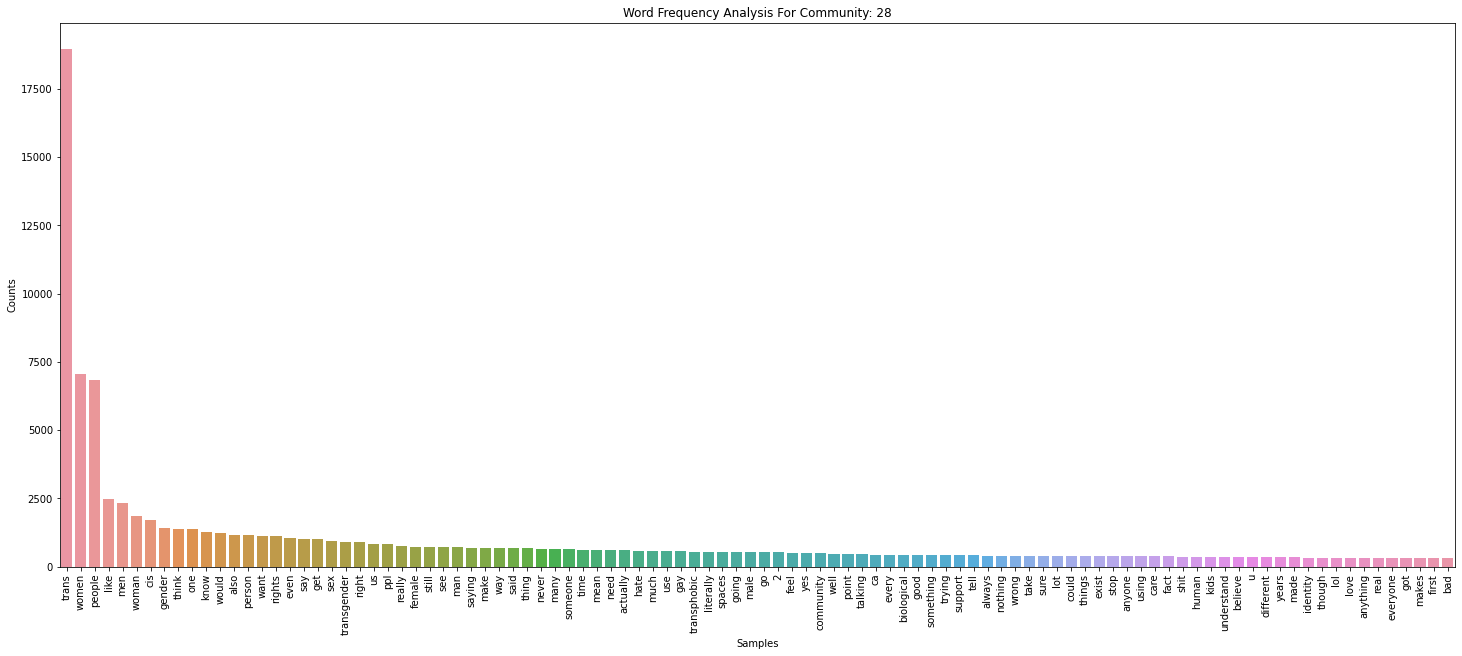

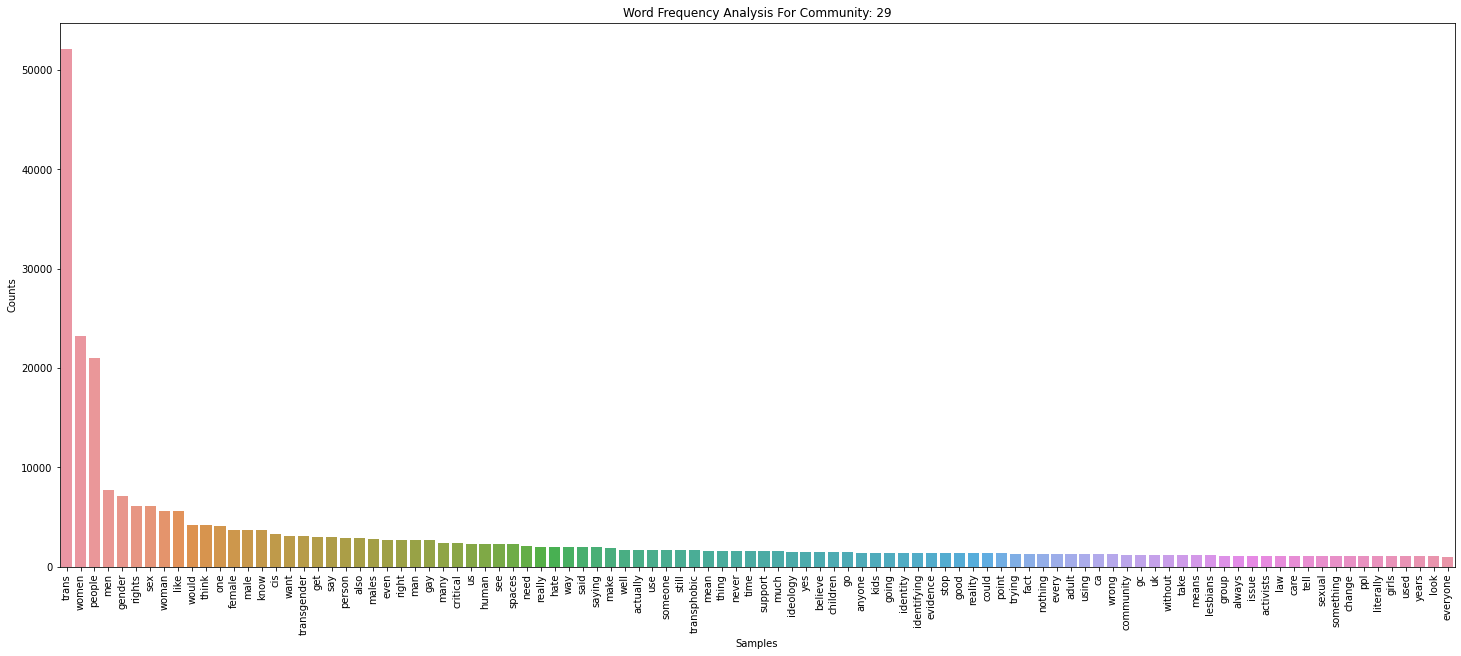

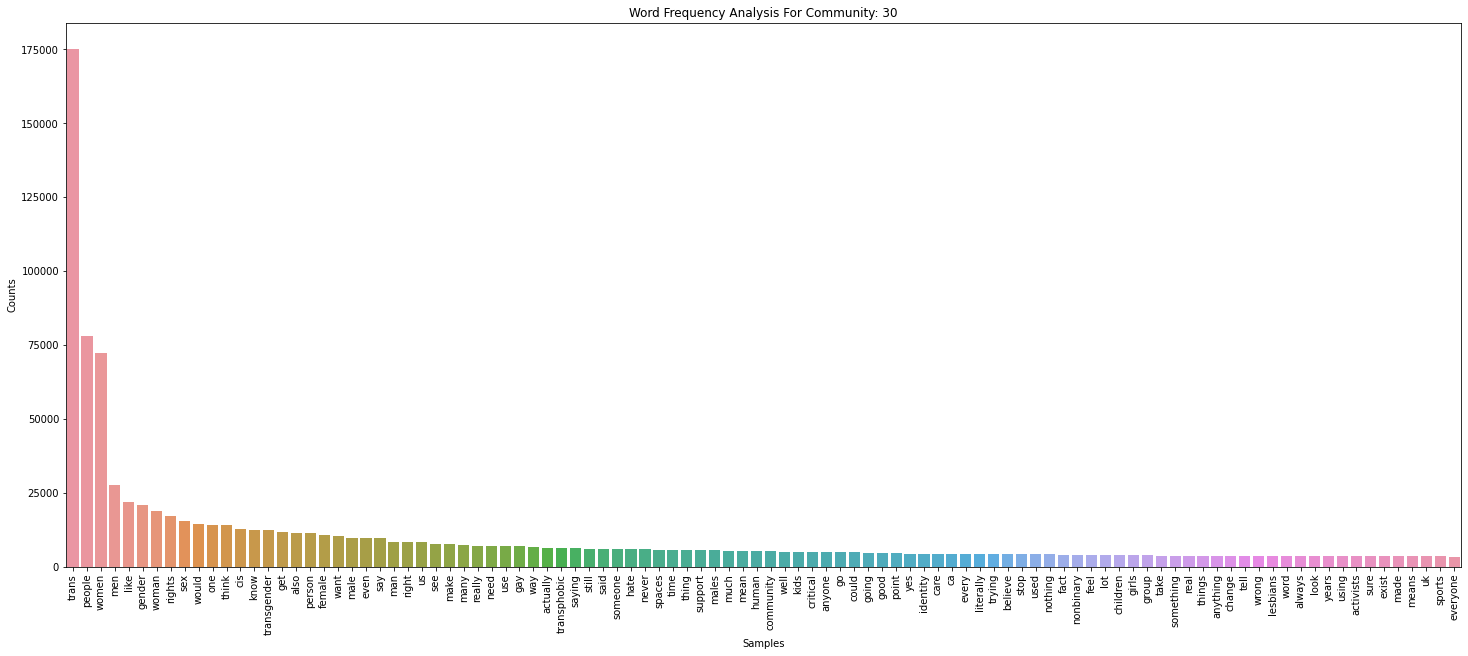

In [43]:
for mod_community, words in sorted(word_collections.items()):
    nlp_words = nltk.FreqDist(words)
    all_fdist = pd.Series(dict(nlp_words.most_common(100)))
    fig, ax = plt.subplots(figsize=(25,10))
    ax.set_title("Word Frequency Analysis For Community: %s" % mod_community)
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    ax.set(xlabel="Samples", ylabel="Counts")
    plt.xticks(rotation=90)
    plt.savefig("dataset_freq_anal/%s.jpg" % mod_community)


In [ ]:
unload_db(name, base)
